In [1]:
import random

import tqdm
import umap
import numpy as np
import pandas as pd
import sklearn
from sklearn import cluster        # Algoritmos de clustering.
from sklearn import datasets       # Crear datasets.
from sklearn import decomposition  # Algoritmos de reduccion de dimensionalidad.

# Visualizacion.
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

random_state = 42

%matplotlib inline

## 1. Métodos de *clustering*

Este ejercicio trata de explorar distintas técnicas de agrupamiento ajustándolas a distintos conjuntos de datos.

El objetivo es doble: entender la influencia de los parámetros en su comportamiento, y conocer sus limitaciones en la búsqueda de estructuras de datos.

### Generación de los conjuntos de datos

In [2]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.6, random_state=random_state)
X_moons, y_moons = datasets.make_moons(n_samples=1000, noise=.07, random_state=random_state)
X_circles, y_circles = datasets.make_circles(n_samples=1000, factor=.5, noise=.05, random_state=random_state)

Cada dataset tiene 2 variables: una variable *X* que contiene 2 features (columnas) y tantas filas como muestras. Y una variable *y* que alberga las etiquetas que identifican cada cluster.

A lo largo del ejercicio no se usará la variable *y* (sólo con el objetivo de visualizar). El objetivo es a través de los distintos modelos de *clustering* conseguir encontrar las estructuras descritas por las variables *y*.

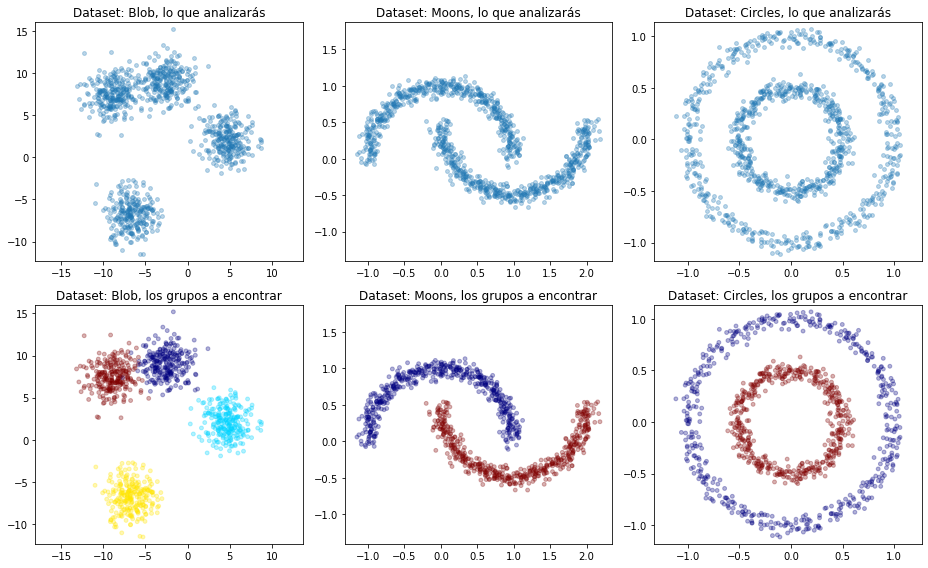

In [3]:
fig, axis = plt.subplots(2, 3, figsize=(13, 8))
for i, (X, y, ax, name) in enumerate(zip([X_blobs, X_moons, X_circles] * 2,
                                         [None] * 3 + [y_blobs, y_moons, y_circles],
                                         axis.reshape(-1),
                                         ['Blob', 'Moons', 'Circles'] * 2)):
    ax.set_title('Dataset: {}, '.format(name) + ('lo que analizarás' if i < 3 else 'los grupos a encontrar'))
    ax.scatter(X[:,0], X[:,1], s=15, c=y, alpha=.3, cmap='jet')
    ax.axis('equal')
plt.tight_layout()

### 1 b. Algoritmos basados en densidad: DBSCAN

En este apartado se pide aplicar clustering por densidad como [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) a los datasets anteriores para detectar los dos grupos subyacentes.

Ésta es una visualización intuitiva de su funcionamiento: https://www.youtube.com/watch?v=RDZUdRSDOok

In [4]:
X, y = X_blobs, y_blobs

In [5]:
from sklearn.cluster import DBSCAN

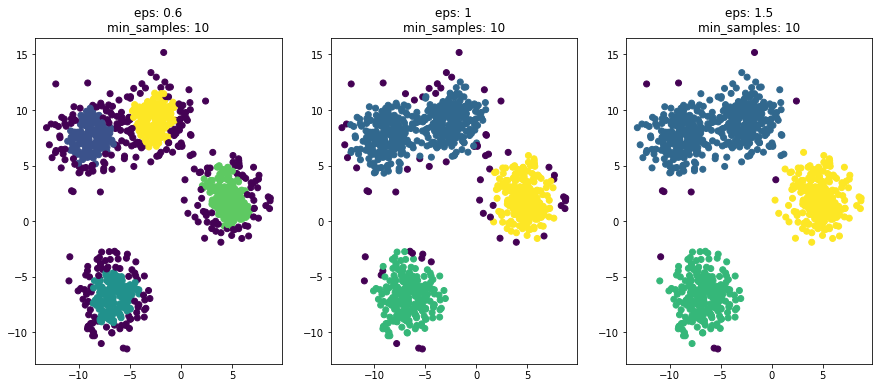

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15,6))

for (eps, min_samples), ax in zip([(0.6, 10), (1, 10), (1.5, 10)], axs):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_db = db.fit_predict(X)
    ax.set_title('eps: {}\nmin_samples: {}'.format(eps, min_samples))
    ax.scatter(X[:, 0], X[:, 1], c=y_db)

plt.show()

In [7]:
db = DBSCAN(eps=0.6, min_samples=10)
y_db = db.fit_predict(X)

def sum_cluster(cluster, n):
    result = 0
    for val in cluster:
        if val == n:
            result += 1
    return result

print('Cantidad de elementos del cluster 0: {}'.format(sum_cluster(y_db, 0)))
print('Cantidad de elementos del cluster 1: {}'.format(sum_cluster(y_db, 1)))
print('Cantidad de elementos del cluster 2: {}'.format(sum_cluster(y_db, 2)))
print('Cantidad de elementos del cluster 3: {}'.format(sum_cluster(y_db, 3)))
print('Cantidad de elementos outliers: {}'.format(sum_cluster(y_db, -1)))

Cantidad de elementos del cluster 0: 173
Cantidad de elementos del cluster 1: 165
Cantidad de elementos del cluster 2: 178
Cantidad de elementos del cluster 3: 168
Cantidad de elementos outliers: 316


El dataset **blobs** contiene 4 clústers originales y para generar resultados similares se ha utilizado DBSCAN con los parámetros de eps y min_sample con 0.6 y 10 respectivamente.

Para el ejercicio, con DBSCAN se generó 4 zonas con alta densidad de concentración de puntos. A diferencia de K-Means, DBSCAN identificaron 316 puntos extremos que no pertenecen a ningún clúster por la dispersión de sus valores en la zona de concentración.

In [8]:
X, y = X_moons, y_moons

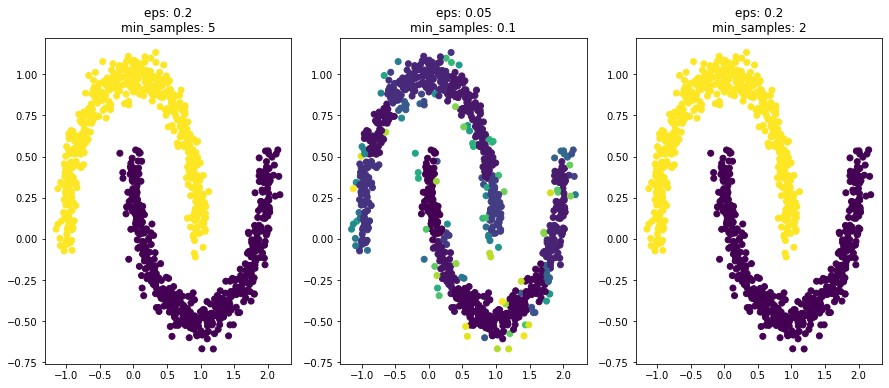

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15,6))

for (eps, min_samples), ax in zip([(0.2, 5), (0.05, 0.1), (0.2, 2)], axs):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_db = db.fit_predict(X)
    ax.set_title('eps: {}\nmin_samples: {}'.format(eps, min_samples))
    ax.scatter(X[:, 0], X[:, 1], c=y_db)

plt.show()

In [10]:
db = DBSCAN(eps=0.2, min_samples=0.5)
y_db = db.fit_predict(X)

print('Cantidad de elementos del cluster 0: {}'.format(sum_cluster(y_db, 0)))
print('Cantidad de elementos del cluster 1: {}'.format(sum_cluster(y_db, 1)))

Cantidad de elementos del cluster 0: 500
Cantidad de elementos del cluster 1: 500


El dataset **moons** contiene 2 clústers y DBSCAN obtuvo los mismos resultados del original con los parámetros de eps y min_sample que fueron de 0.2 y 5 respectivamente.

DBSCAN formó 2 clústers debido a que existen 2 zonas con alta densidad de concentración de puntos y una distancia considerable entre ellos.

In [11]:
X, y = X_circles, y_circles

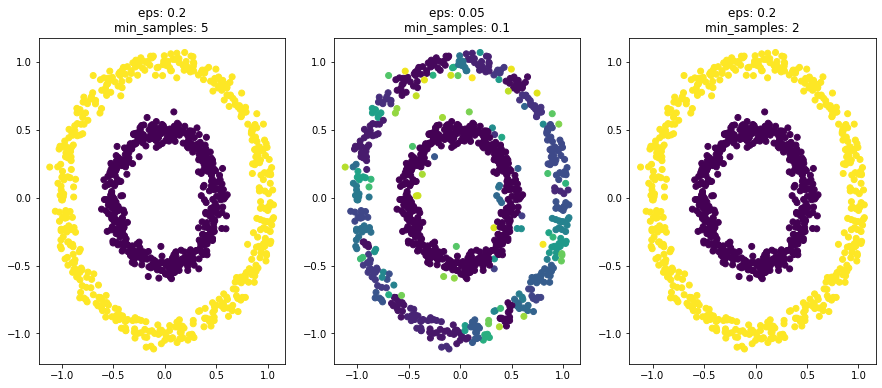

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15,6))

for (eps, min_samples), ax in zip([(0.2, 5), (0.05, 0.1), (0.2, 2)], axs):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_db = db.fit_predict(X)
    ax.set_title('eps: {}\nmin_samples: {}'.format(eps, min_samples))
    ax.scatter(X[:, 0], X[:, 1], c=y_db)

plt.show()

In [13]:
db = DBSCAN(eps=0.2, min_samples=0.5)
y_db = db.fit_predict(X)

print('Cantidad de elementos del cluster 0: {}'.format(sum_cluster(y_db, 0)))
print('Cantidad de elementos del cluster 1: {}'.format(sum_cluster(y_db, 1)))

Cantidad de elementos del cluster 0: 500
Cantidad de elementos del cluster 1: 500


In [14]:
El dataset **circles** contiene 2 clústers y DBSCAN obtuvo los mismos resultados del original con los parámetros de eps y min_sample que fueron de 0.2 y 5 respectivamente.

DBSCAN formó 2 clústers debido a que existen 2 zonas con alta densidad de concentración de puntos.

SyntaxError: invalid syntax (<ipython-input-14-5d4880c78f48>, line 1)